### Import and Data Loadings

In [47]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('mtcars.csv')
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Reminder

#### p-value < 0.05: H0 is does not hold and H1 is accepted.

#### p-value ≥ 0.05: H0 is accepted and H1 does not hold.

## Hypothesis 1

### Cars with 4 cylinders have, on average, a higher miles-per-gallon (mpg) than cars with 6 or 8 cylinders.

#### H0: There is no difference in the average mpg between the cylinder groups.

#### H1: At least one group has a different mean mpg than the others.

Hypothesis 1 (mpg by cyl):
F-statistic: 39.6975, p-value: 0.0000


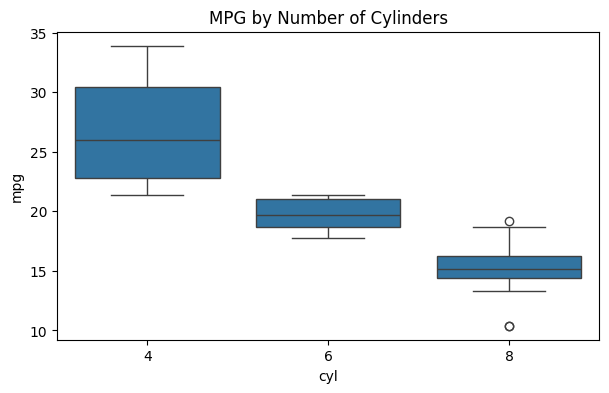

In [48]:
# Hypothesis 1 - ANOVA
mpg_4 = df[df['cyl'] == 4]['mpg']
mpg_6 = df[df['cyl'] == 6]['mpg']
mpg_8 = df[df['cyl'] == 8]['mpg']

# One-way ANOVA
anova_res = stats.f_oneway(mpg_4, mpg_6, mpg_8)
print("Hypothesis 1 (mpg by cyl):")
print(f"F-statistic: {anova_res.statistic:.4f}, p-value: {anova_res.pvalue:.4f}")

# Visualization (optional)
plt.figure(figsize=(7,4))
sns.boxplot(x='cyl', y='mpg', data=df)
plt.title("MPG by Number of Cylinders")
plt.show()


## Hypothesis 2

### Cars with manual transmission (am = 1) have, on average, a lower weight (wt) than cars with automatic transmission (am = 0).

#### H0: There is no difference in the average weight (wt) between cars with manual and automatic transmission.

#### H1: There is a significant difference in the average weight (wt) between cars with manual and automatic transmission.

Hypothesis 2 (wt by transmission):
T-statistic: -5.4939, p-value: 0.0000


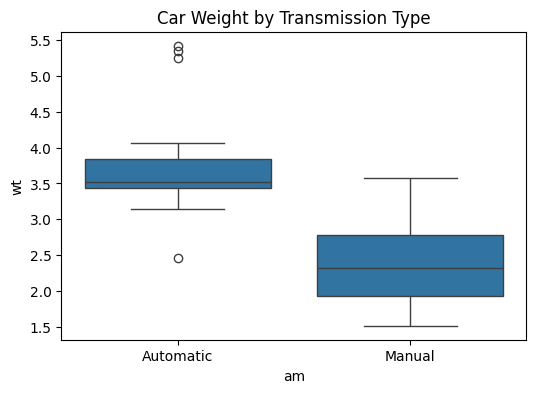

In [49]:
# Hypothesis 2 - t-test
wt_manual = df[df['am'] == 1]['wt']
wt_auto = df[df['am'] == 0]['wt']

# Independent t-test
# Welch Test
ttest_res = stats.ttest_ind(wt_manual, wt_auto, equal_var=False)  
print("Hypothesis 2 (wt by transmission):")
print(f"T-statistic: {ttest_res.statistic:.4f}, p-value: {ttest_res.pvalue:.4f}")

# Visualization 
plt.figure(figsize=(6,4))
sns.boxplot(x='am', y='wt', data=df)
plt.xticks([0,1], ['Automatic', 'Manual'])
plt.title("Car Weight by Transmission Type")
plt.show()


## Hypothesis 3

### There is a negative correlation between horsepower (hp) and miles-per-gallon (mpg) as horsepower increases, fuel efficiency decreases.

#### H0: There is a positive correlation between horsepower (hp) and miles-per-gallon (mpg) in cars.

#### H1: There is a negative correlation between horsepower (hp) and miles-per-gallon (mpg) in cars.

Hypothesis 3 (hp vs. mpg):
Pearson correlation: -0.7762, p-value: 0.0000


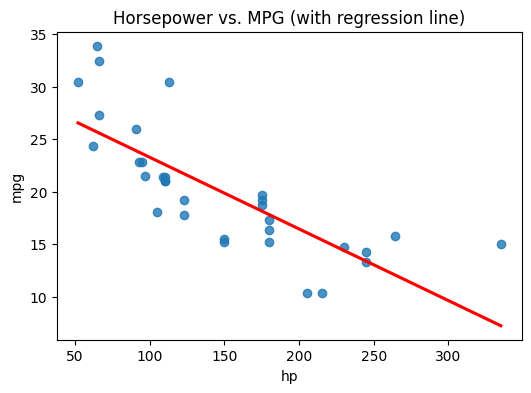

In [50]:
# Hypothesis 3 - Correlation
corr_res = stats.pearsonr(df['hp'], df['mpg'])
print("Hypothesis 3 (hp vs. mpg):")
print(f"Pearson correlation: {corr_res[0]:.4f}, p-value: {corr_res[1]:.4f}")

# Visualization
plt.figure(figsize=(6,4))
sns.regplot(x='hp', y='mpg', data=df, scatter=True, ci=None, line_kws={'color':'red'})
plt.title("Horsepower vs. MPG (with regression line)")
plt.show()


# Changed Dataset

In [51]:
df_m = pd.read_csv('mtcars_manipulated.csv')
df_m.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,16.91,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,16.91,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,17.52,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,17.06,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


## Hypothesis 1

Hypothesis 1 (mpg by cyl):
F-statistic: 1.6130, p-value: 0.2167


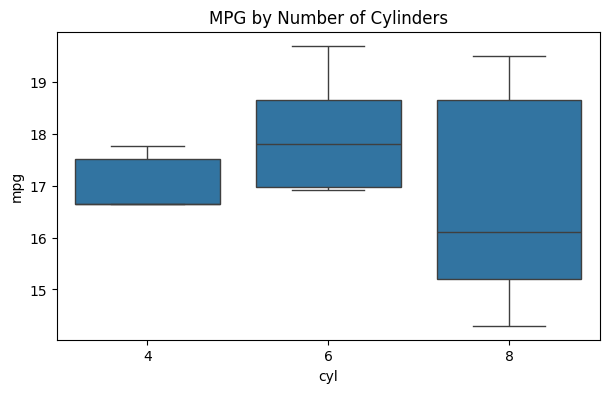

In [ ]:
# Hypothesis 1 - ANOVA
mpg_4_m = df_m[df_m['cyl'] == 4]['mpg']
mpg_6_m = df_m[df_m['cyl'] == 6]['mpg']
mpg_8_m= df_m[df_m['cyl'] == 8]['mpg']

# One-way ANOVA
anova_res_m = stats.f_oneway(mpg_4_m, mpg_6_m, mpg_8_m)
print("Hypothesis 1 (mpg by cyl):")
print(f"F-statistic: {anova_res_m.statistic:.4f}, p-value: {anova_res_m.pvalue:.4f}")

# Visualization
plt.figure(figsize=(7,4))
sns.boxplot(x='cyl', y='mpg', data=df_m)
plt.title("MPG by Number of Cylinders")
plt.show()

## Hypothesis 2

Hypothesis 2 (wt by transmission):
T-statistic: -1.8816, p-value: 0.0700


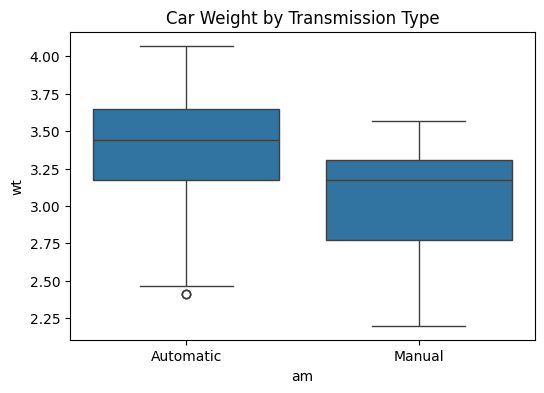

In [53]:
# Hypothesis 2 - t-test
wt_manual_m = df_m[df_m['am'] == 1]['wt']
wt_auto_m= df_m[df_m['am'] == 0]['wt']

# Independent t-test
# Welch Test
ttest_res_m = stats.ttest_ind(wt_manual_m, wt_auto_m, equal_var=False)  
print("Hypothesis 2 (wt by transmission):")
print(f"T-statistic: {ttest_res_m.statistic:.4f}, p-value: {ttest_res_m.pvalue:.4f}")

# Visualization 
plt.figure(figsize=(6,4))
sns.boxplot(x='am', y='wt', data=df_m)
plt.xticks([0,1], ['Automatic', 'Manual'])
plt.title("Car Weight by Transmission Type")
plt.show()

## Hypothesis 3

Hypothesis 3 (hp vs. mpg):
Pearson correlation: 0.5006, p-value: 0.0035


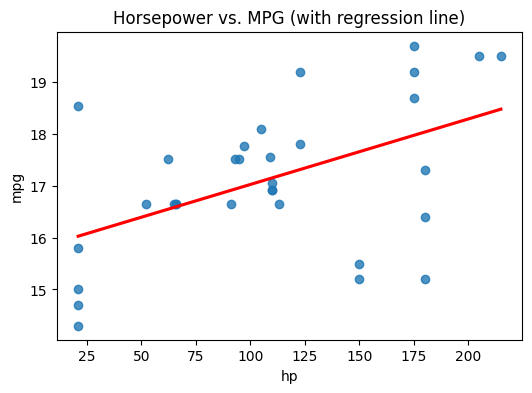

In [54]:
# Hypothesis 3 - Correlation
corr_res_m = stats.pearsonr(df_m['hp'], df_m['mpg'])
print("Hypothesis 3 (hp vs. mpg):")
print(f"Pearson correlation: {corr_res_m[0]:.4f}, p-value: {corr_res_m[1]:.4f}")

# Visualization
plt.figure(figsize=(6,4))
sns.regplot(x='hp', y='mpg', data=df_m, scatter=True, ci=None, line_kws={'color':'red'})
plt.title("Horsepower vs. MPG (with regression line)")
plt.show()

# Difference of Original and Manipulated Data

In [55]:
df_1 = pd.read_csv("mtcars.csv")
df_2 = pd.read_csv("mtcars_manipulated.csv")

cols = ["mpg", "wt", "hp"]

def highlight_changes(val, orig, new):
    return 'background-color: yellow' if not np.isclose(orig, new, atol=1e-6) else ''

def highlight_diff(row):
    styles = []
    for col in df_1.columns:
        if col in cols:
            orig = row[col]
            new = df_2.loc[row.name, col]
            styles.append(highlight_changes(row[col], orig, new))
        else:
            styles.append('')
    return styles

styled = df.style.apply(highlight_diff, axis=1)
styled

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
1,Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
2,Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
3,Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
4,Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
5,Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
6,Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
7,Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
8,Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2
9,Merc 280,19.200000,6,167.600000,123,3.920000,3.440000,18.300000,1,0,4,4
